In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("Loan_Data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [2]:
print("Property Area:", df.Property_Area.unique())
print("Dependents: ", df.Dependents.unique())
df = df.drop(['Loan_ID'], axis=1)

Property Area: ['Urban' 'Rural' 'Semiurban']
Dependents:  ['0' '1' '2' '3+' nan]


**Convert string values into integer**

In [3]:
df['Gender'] = df['Gender'].replace({'Male':0, 'Female':1})
df['Married'] = df['Married'].replace({'No':0, 'Yes': 1})
# Dependents = 3+ transform to what
df['Dependents'] = df['Dependents'].replace({'0':0, '1':1, '2':2, '3+':3})
df['Education'] = df['Education'].replace({'Not Graduate':0, 'Graduate':1})
df['Self_Employed'] = df['Self_Employed'].replace({'No':0,'Yes':1})
df['Property_Area'] = df['Property_Area'].replace({'Rural':0, "Semiurban":1, "Urban":2})
df['Loan_Status'] = df['Loan_Status'].replace({"N":0, "Y":1})

df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,0.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,0.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,0.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,0.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,0,1
610,0.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,0,1
611,0.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,2,1
612,0.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,2,1


Drop Null values

In [4]:
print(" \nCount total NaN at each column in a DataFrame : \n\n",df.isnull().sum())
df = df.dropna()
print(" \nCount total NaN at each column in a DataFrame : \n\n",df.isnull().sum())


 
Count total NaN at each column in a DataFrame : 

 Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
 
Count total NaN at each column in a DataFrame : 

 Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


# Baseline Accuracy (Without feature selection)


In [5]:
array = df.values
X = array[:, 0:11]
y = array[:, 11]

X.shape

(480, 11)

In [8]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import RidgeClassifier
from sklearn import svm

# define a function that will train a classifier and then measure performance

def train_and_measure_performance(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109) # 70% training and 30% test
    #Create a svm Classifier
    reg_clf = RidgeClassifier()
    #reg_clf = svm.SVC(kernel='linear') # Linear Kernel

    #Train the model using the training sets
    reg_clf.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = reg_clf.predict(X_test)
    # Model Accuracy: how often is the classifier correct?
    return (metrics.accuracy_score(y_test, y_pred))

baseline_performance = train_and_measure_performance(X, y)
print (f'Baseline accuracy with all features is {baseline_performance}')

Baseline accuracy with all features is 0.8333333333333334


In [10]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import RidgeClassifier
from sklearn import svm

# Define the classifier
#reg_clf = RidgeClassifier()
reg_clf = svm.SVC(kernel='linear') # Linear Kernel

# define a function that will train a classifier and then measure performance
def train_and_measure_performance(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109) # 70% training and 30% test

    #Train the model using the training sets
    reg_clf.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = reg_clf.predict(X_test)
    # Model Accuracy: how often is the classifier correct?
    return (metrics.accuracy_score(y_test, y_pred))

# Train the classifier and save it
baseline_performance = train_and_measure_performance(X, y)
print (f'Baseline accuracy with all features is {baseline_performance}')

import joblib
joblib.dump(reg_clf,'reg_clf.pkl')


Baseline accuracy with all features is 0.7916666666666666


['reg_clf.pkl']

# 1. Chi Square

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109) # 70% training and 30% test

# Feature extraction--select the 4 best features
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X_train, y_train)

# Summarize scores
np.set_printoptions(precision=3)
feature_names = df.columns[0:11]

for i, feature in enumerate (feature_names):
    print (f'{fit.scores_[i]}, {feature}') 
#print (feature_names)
#print(fit.scores_)


2.05291254658745, Gender
1.8020825983162063, Married
3.980216143425766, Dependents
0.1517582881007762, Education
0.42385904508909794, Self_Employed
689.2031407075731, ApplicantIncome
2507.619370539653, CoapplicantIncome
47.85289075142041, LoanAmount
3.669792455859521, Loan_Amount_Term
12.121975806875739, Credit_History
0.4486825680739998, Property_Area


In [27]:
sorted_scores = sorted(fit.scores_)
zipped_lists = zip(fit.scores_, feature_names)
sorted_pairs = sorted(zipped_lists)
for f, val in sorted_pairs:
    print (f'{f} - {val}')

0.1517582881007762 - Education
0.42385904508909794 - Self_Employed
0.4486825680739998 - Property_Area
1.8020825983162063 - Married
2.05291254658745 - Gender
3.669792455859521 - Loan_Amount_Term
3.980216143425766 - Dependents
12.121975806875739 - Credit_History
47.85289075142041 - LoanAmount
689.2031407075731 - ApplicantIncome
2507.619370539653 - CoapplicantIncome


The highest is Coapplicant Income, ApplicantIncome, LoanAmmount and Credit_History

In [28]:
# Make a copy of the data for Chi-squared method...
#First, need to remove the 'class' column since that is the answer
chi_df = df.drop(columns=["Loan_Status"])

# delete the columns we don't want
# only take top 6 columns
chi_df = chi_df.drop(columns=["Education","Self_Employed","Property_Area","Married", "Gender"])

d_chi = chi_df.values 
X_1 = d_chi[:,:]

perf = train_and_measure_performance(X_1, y)
print (f'Accuracy with best features using Chi-square is {perf}')

Accuracy with best features using Chi-square is 0.8333333333333334


# Recursive Feature Elimination (RFE)

In [29]:
# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression

estimator = SVR(kernel="linear")
# we will ask for the top 4 features
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
print(selector.support_)
rank=selector.ranking_
print ("Or if you want to see the ranking of those that didn't make the cut...")
print(rank)


[False False False  True False False False False False  True  True]
Or if you want to see the ranking of those that didn't make the cut...
[4 2 3 1 5 8 9 7 6 1 1]


In [30]:
# drop all columns not '1'
X_1 = df.drop(df.columns[11], axis=1)  # get rid of 'class'
#print("X_1 before drop\n", X_1)
perf = train_and_measure_performance(X_1, y)
print (f'Accuracy with without using RFE is {perf}')
# for i in range(10):
#    if selector.support_[i] == False:
#       X_1 = X_1.drop(X_1.columns[i], axis=1)

#This will drop the columns that are not supported by the RFE selector,
# starting from the highest index and working its way down to the lowest index.
for i in reversed(range(10)):
    if selector.support_[i] == False:
        X_1 = X_1.drop(X_1.columns[i], axis=1)

#print("X_1 after drop\n",X_1)
perf = train_and_measure_performance(X_1, y)
print (f'Accuracy with best features using RFE is {perf}')

Accuracy with without using RFE is 0.8333333333333334
Accuracy with best features using RFE is 0.8333333333333334


# Embedded Model

# From Sheikh


## RFE


In [55]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load loan dataset from a CSV file
loan_df = df

# Split the dataset into features (X) and target (y)
y1 = loan_df['Loan_Status']
X1 = loan_df.drop(['Loan_Status'], axis=1)

# Define the number of features to select
num_features = 6

# Create a Ridge Classifier model
rfe_clf = RidgeClassifier()

# Use RFE to select the top features
rfe = RFE(estimator=clf, n_features_to_select=num_features, step=1)

X_rfe = rfe.fit_transform(X1, y1)

# Split the selected features into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.3, random_state=109)

# Train the model using the training sets
rfe_clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = rfe_clf.predict(X_test)

# Compute the accuracy score of the model
accuracy = metrics.accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f'Accuracy with RFE and {num_features} features is {accuracy}')


Accuracy with RFE and 6 features is 0.8333333333333334


In [46]:
# Print the mask of selected features
#print(rfe.support_)

# Select the corresponding columns from X1
rfe_selected_columns = X1.columns[rfe.support_]

# Print the selected columns
print(rfe_selected_columns)


Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History',
       'Property_Area'],
      dtype='object')


In [65]:
suka = np.array([1, 0, 1, 0, 1, 2]).reshape(1, -1)
predtest = rfe_clf.predict(suka)
print(predtest)

[1]


In [71]:
import joblib
joblib.dump(rfe_clf,'rfe_clf.pkl')

['rfe_clf.pkl']

## CFS

In [66]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from joblib import dump

# Load loan dataset from a CSV file
#loan_df = pd.read_csv('loan_dataset.csv')

# Split the dataset into features (X) and target (y)
y = loan_df['Loan_Status']
X = loan_df.drop(['Loan_Status'], axis=1)

# Use SelectKBest with f_classif to select the top features
k = 6 # select top k features
selector = SelectKBest(f_classif, k=k)
X_kbest = selector.fit_transform(X, y)

# Split the selected features into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size=0.3, random_state=109)

# Create a Ridge Classifier model
cfs_clf = RidgeClassifier()

# Train the model using the training sets
cfs_clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = cfs_clf.predict(X_test)

# Compute the accuracy score of the model
accuracy = metrics.accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f'Accuracy with SelectKBest and {k} features is {accuracy}')


Accuracy with SelectKBest and 6 features is 0.8333333333333334


In [44]:
# Get a Boolean mask of selected features
mask = selector.get_support()

# Get the names of selected columns
cfs_selected_columns = X.columns[mask]

# Print the selected column names
print(cfs_selected_columns)


Index(['Gender', 'Married', 'Education', 'CoapplicantIncome', 'LoanAmount',
       'Credit_History'],
      dtype='object')


In [69]:
suka = np.array([1, 0, 2, 3383, 600, 0]).reshape(1, -1)
predtest = cfs_clf.predict(suka)
print(predtest)

[0]


## PCA


In [18]:
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from joblib import dump

# Load loan dataset from a CSV file
#loan_df = pd.read_csv('loan_dataset.csv')

# Split the dataset into features (X) and target (y)
y = loan_df['Loan_Status']
X = loan_df.drop(['Loan_Status'], axis=1)

# Apply PCA to reduce the dimensionality of the feature space
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

# Split the PCA-transformed features into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=109)

# Create a Ridge Classifier model
clf = RidgeClassifier()

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Compute the accuracy score of the model
accuracy = metrics.accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f'Accuracy with PCA and {pca.n_components_} components is {accuracy}')




Accuracy with PCA and 5 components is 0.7152777777777778


In [12]:
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load loan dataset from a CSV file
loan_df = df

# Split the dataset into features (X) and target (y)
y = loan_df['Loan_Status']
X = loan_df.drop(['Loan_Status'], axis=1)

# Apply PCA to reduce the dimensionality of the feature space
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

# Get the names of selected columns
col_names = [f"PC{i+1}" for i in range(pca.n_components_)]

# Split the PCA-transformed features into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=109)

# Create a Ridge Classifier model
pca_clf = RidgeClassifier()

# Train the model using the training sets
pca_clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = pca_clf.predict(X_test)

# Compute the accuracy score of the model
accuracy = metrics.accuracy_score(y_test, y_pred)

# Print the accuracy score and the names of the selected columns
print(f'Accuracy with PCA and {pca.n_components_} components is {accuracy}')
print(f'Selected columns: {col_names}')

# Print the contribution of the original features to each principal component
components_df = pd.DataFrame(pca.components_, columns=X.columns)
print(components_df)


Accuracy with PCA and 5 components is 0.7152777777777778
Selected columns: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
     Gender   Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0 -0.000002  0.000003    0.000023   0.000009       0.000010         0.997819   
1 -0.000024  0.000020    0.000007   0.000015       0.000003         0.065589   
2  0.000028  0.000541    0.000751   0.000814       0.000065        -0.006071   
3 -0.000631  0.001419    0.002482  -0.000174       0.000272        -0.004294   
4 -0.096131  0.207173    0.972668  -0.023804       0.004778        -0.000007   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0          -0.065646    0.006915         -0.000122       -0.000003   
1           0.997813    0.008155         -0.000185       -0.000002   
2          -0.006253    0.826650          0.562646        0.000043   
3          -0.004469    0.562608         -0.826695       -0.000188   
4           0.000006   -0.002202          0.001854       -

In [15]:
import joblib
joblib.dump(pca_clf,'pca_clf.pkl')

['pca_clf.pkl']

In [21]:
df.to_csv('file_name.csv', encoding='utf-8')

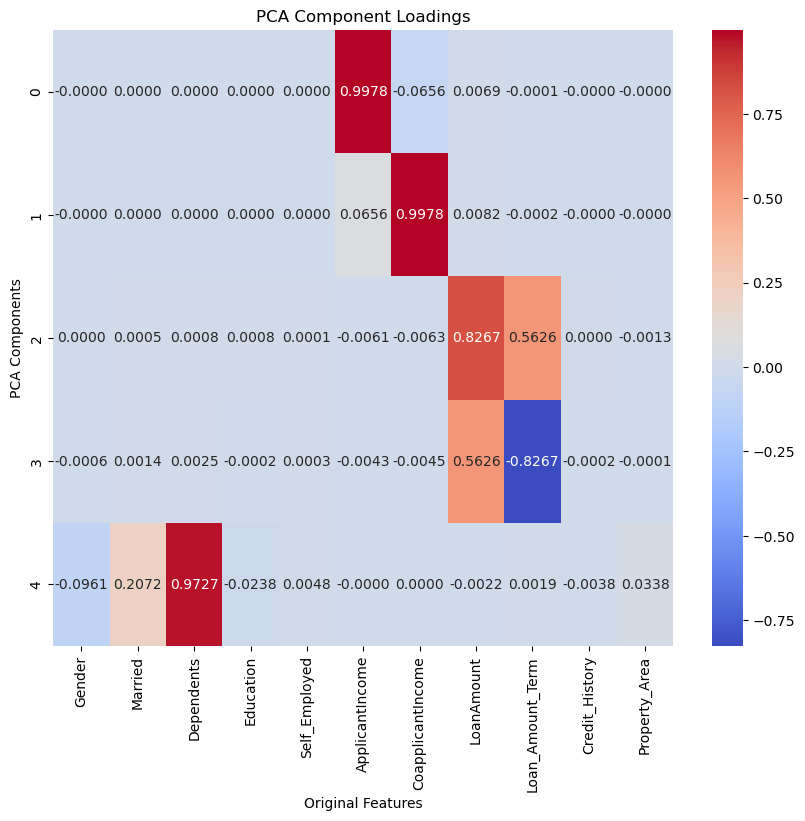

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the component loadings
plt.figure(figsize=(10, 8))
sns.heatmap(components_df, cmap='coolwarm', annot=True, fmt='.4f')
plt.title('PCA Component Loadings')
plt.xlabel('Original Features')
plt.ylabel('PCA Components')
plt.show()


## Mutual Information-based Feature Selection (MIFS)

In [54]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from joblib import dump

# Load loan dataset from a CSV file
# loan_df = pd.read_csv('loan_dataset.csv')

# Split the dataset into features (X) and target (y)
y = loan_df['Loan_Status']
X = loan_df.drop(['Loan_Status'], axis=1)

# Select the K best features based on mutual information
selector = SelectKBest(mutual_info_classif, k=5).fit(X, y)
X_mifs = selector.transform(X)

# Split the MIFS-transformed features into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_mifs, y, test_size=0.3, random_state=109)

# Create a Ridge Classifier model
clf = RidgeClassifier()

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Compute the accuracy score of the model
accuracy = metrics.accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f'Accuracy with MIFS and {selector.k} features is {accuracy}')


Accuracy with MIFS and 5 features is 0.8333333333333334


##Univariate Feature Selection (UFS)


In [20]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from joblib import dump

# Load loan dataset from a CSV file
#loan_df = pd.read_csv('loan_dataset.csv')

# Split the dataset into features (X) and target (y)
y = loan_df['Loan_Status']
X = loan_df.drop(['Loan_Status'], axis=1)

# Use SelectKBest with f_classif scoring function to select the top 5 features
ufs = SelectKBest(f_classif, k=5)
X_ufs = ufs.fit_transform(X, y)

# Split the selected features into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_ufs, y, test_size=0.3, random_state=109)

# Create a Ridge Classifier model
clf = RidgeClassifier()

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Compute the accuracy score of the model
accuracy = metrics.accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f'Accuracy with UFS and {ufs.k} features is {accuracy}')




Accuracy with UFS and 5 features is 0.8333333333333334
